In [30]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
citydata = pd.read_csv(city_data_to_load)
ridedata = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
merge_df = pd.merge(ridedata, citydata, on="city", how="left")

# Display the data table for preview
merge_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


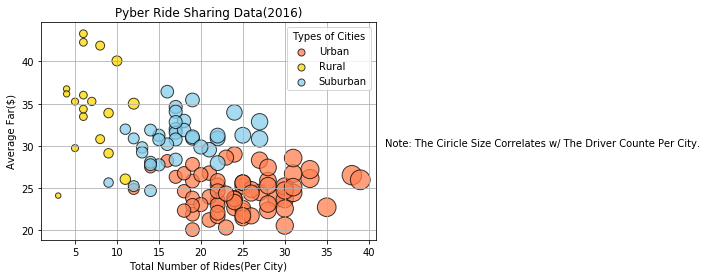

In [28]:
#Type of City
urbantype = merge_df[merge_df["type"] == "Urban"].groupby([merge_df["city"]])
ruraltype = merge_df[merge_df["type"] == "Rural"].groupby([merge_df["city"]])
suburbantype = merge_df[merge_df["type"] == "Suburban"].groupby([merge_df["city"]])

#Averages fares for each city
averagefare_urban = urbantype["fare"].mean()
averagefare_suburban = suburbantype["fare"].mean()
averagefare_rural = ruraltype["fare"].mean()

#Total Number of Rides Per City
totalrides_urban = urbantype["ride_id"].count()
totalrides_suburban = suburbantype["ride_id"].count()
totalrides_rural = ruraltype["ride_id"].count()

#Total Number of Drivers Per City
totaldrivers_urban = urbantype["driver_count"].count()
totaldrivers_suburban = suburbantype["driver_count"].count()
totaldrivers_rural = ruraltype["driver_count"].count()

#Building the scatter plots for each city type
plt.scatter(totalrides_urban, averagefare_urban, label="Urban", s=totaldrivers_urban*10, color=["coral"], edgecolor="black", alpha = 0.75, marker="o")
plt.scatter(totalrides_rural, averagefare_rural, label="Rural", s=totaldrivers_rural*10, color=["gold"], edgecolor="black", alpha = 0.75, marker="o")
plt.scatter(totalrides_suburban, averagefare_suburban, label="Suburban", s=totaldrivers_suburban*10, color=["skyblue"], edgecolor="black", alpha = 0.75, marker="o")
plt.grid()

#Creating scatterplot labels
plt.xlabel("Total Number of Rides(Per City)")
plt.ylabel("Average Far($)")
plt.title("Pyber Ride Sharing Data(2016)")

#Creating legend w/sizes
legend=plt.legend(fontsize = 10, title = "Types of Cities", loc="best")
legend.legendHandles[0]._sizes=[50]
legend.legendHandles[1]._sizes=[50]
legend.legendHandles[2]._sizes=[50]

#Incorporating a text label
plt.text(42,30,"Note: The Ciricle Size Correlates w/ The Driver Counte Per City.")

#Saving figure
plt.savefig("images/PyberScatterPicture.png", bbox_inches = "tight")
plt.show()

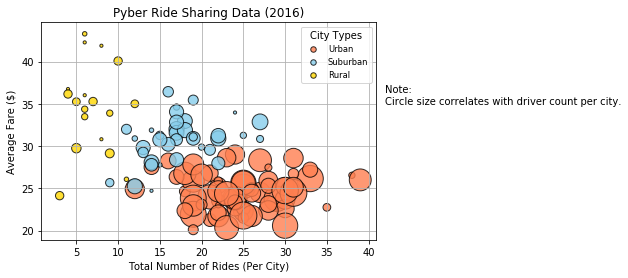

## Total Fares by City Type

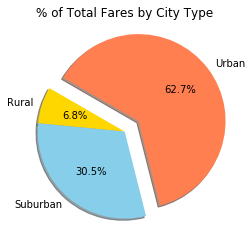

In [20]:
# Calculate Type Percents
pietype = merge_df.groupby(["type"])
sumfare = pietype["fare"].sum()

# Build Pie Chart
labels = ["Rural", "Suburban", "Urban"]
colors = ["gold", "skyblue", "coral"]
explode = (0,0,0.2)
plt.pie(sumfare, labels=labels, explode=explode, colors=colors, autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig("images/PyberTotalFaresbyCityType.png")
plt.show()

# Show Figure
plt.show()

## Total Rides by City Type

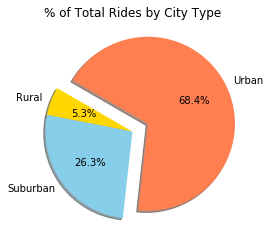

In [21]:
# Calculate Ride Percents
riderscount = pietype["ride_id"].count()

# Build Pie Chart
labels = ["Rural", "Suburban", "Urban"]
colors = ["gold", "skyblue", "coral"]
explode = (0,0,0.2)
plt.pie(riderscount, labels=labels, explode=explode, colors=colors, autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig("images/PyberTotalRidesbyCityType.png")
plt.show()


## Total Drivers by City Type

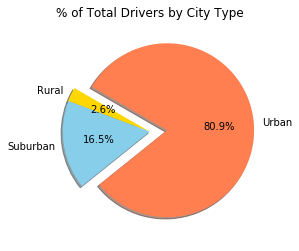

In [27]:
# Calculate Driver Percents
piedrivers = citydata.groupby(["type"])
totaldrivers = piedrivers["driver_count"].sum()

# Build Pie Charts
labels = ["Rural", "Suburban", "Urban"]
colors = ["gold", "skyblue", "coral"]
explode = (0,0,0.2)
plt.pie(totaldrivers, labels=labels, explode=explode, colors=colors, autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Drivers by City Type")
# Save Figure
plt.savefig("images/PyberTotalDriversbyCityType.png")
plt.show()

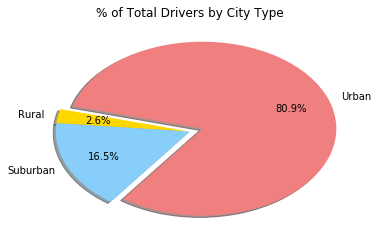